# Supervised learning

## What is machine learning?

- The art and science of:
    - Giving computers the ability to learn to make decisions from data
    - ... without being explicitly programmed.
- Examples:
    - Learning to predict whether an email is spam or not
    - Clustering wikipedia entries into different categories
- Supervised learning: Uses labeled data
- Unsupervised learning: Uses unlabeled data

## Unsupervised Learning

- Uncovering hidden patterns from unlabeled data
- Example:
    - Grouping customers into distinct categories (Clustering)
    
### Reinforcement learning

- Software agents interact with an environment
    - Learn how to optimize their behavior
    - Given a system of rewards and punishments
    - Draws inspiration from behavioral psychology
- Applications
    - Economics
    - Genetics
    - Game Playing
    
## Supervised learning

- Predictor variables/features and a target variable
- Aim: Predict the target variable, given the predictor variables
    - Classification: Target variable consists of categories
    - Regression: Target variable is continuous

### Naming conventions

- Features = Predictor variables = independent variables
- Target variable = dependent variable = response variable

### Applications

- Automate time-comsuming or expensive manual tasks
    - Example: Doctor's diagnosis
- Make predictions about the future
    - Example: Will a customer click on an ad or not?
- Need labeled data
    - Historical data with labels
    - Experiments to get labeled data
    - Crowd-sourcing labeled data
    
### in Python

- We will use scikit-learn/sklearn
    - Integrates well with the SciPy stack
- Other libraries
    - TensorFlow
    - keras

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
iris = datasets.load_iris()

In [2]:
type(iris)

sklearn.utils.Bunch

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [5]:
iris.data.shape

(150, 4)

In [6]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


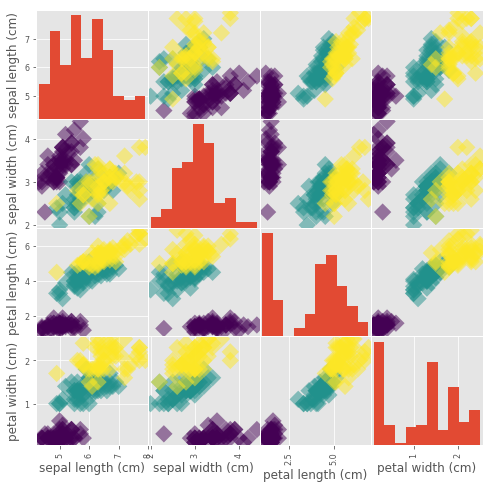

In [7]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [8,8], s = 150, marker = 'D')

plt.show()

In [8]:
import seaborn as sns
columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df = pd.read_csv('house-votes-84.csv', na_values='?', true_values='y', false_values='n', header=None, names=columns)

df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,False,True,False,True,True,True,False,False,False,True,NaN,True,True,True,False,True
1,republican,False,True,False,True,True,True,False,False,False,False,False,True,True,True,False,NaN
2,democrat,NaN,True,True,NaN,True,True,False,False,False,False,True,False,True,True,False,False
3,democrat,False,True,True,False,NaN,True,False,False,False,False,True,False,True,False,False,True
4,democrat,True,True,True,False,True,True,False,False,False,False,True,NaN,True,True,True,True


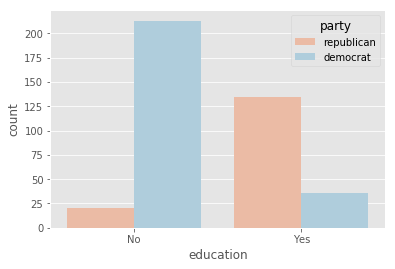

In [9]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

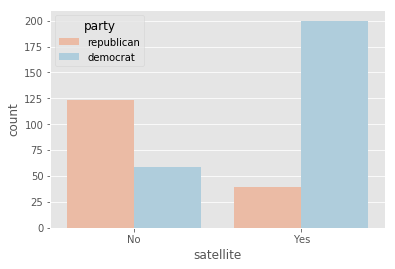

In [10]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

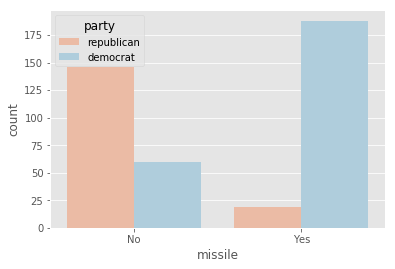

In [11]:
plt.figure()
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

# The classification challenge

k-Nearest Neighbors (kNN) is a basic algorithm that predicts the label of a data point by looking at the `k` closest labeled data points and taking a majority vote.

Scikit-learn fit and predict
- All machine learning models implemented as Python classes
- They implement the algorithms for learning and predicting
- Store the information learned from the data

- Training a model on the data = 'fitting' a model to the data with the `.fit()` method

- To predict the labels of new data: `.predict()` method

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(iris['data'], iris['target'])
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', 
                    metric_params=None, n_jobs=1, n_neighbors=6, p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [13]:
df.dropna(inplace=True)

In [14]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [16]:
new = [0.679339, 0.56772, 0.258386, 0.886898, 0.9364, 0.888567, 0.824796, 0.057864, 0.850986, 0.612423, 0.468909, 0.917026, 0.898227, 0.278631, 0.144511, 0.022552]

In [17]:
X_new = pd.read_csv('new_x.csv')
X_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.679339,0.56772,0.258386,0.886898,0.9364,0.888567,0.824796,0.057864,0.850986,0.612423,0.468909,0.917026,0.898227,0.278631,0.144511,0.022552


In [18]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['republican']


# Measuring model performance

- In classification, accuracy is a commonly used metric
- Accuracy = Fraction of correct predictions
- Which data should be used to compute accuracy?
- How well will the model perform on new data?

- Could compute accuracy on data used to fit classifier
    - NOT indicative of ability to generalize
- Split data into training and test set
    - Fit/train the classifier on the training set
    - Make predictions on test set
    - Compare predictions with the known labels

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [20]:
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 ['democrat' 'democrat' 'republican' 'democrat' 'republican' 'democrat'
 'democrat' 'republican' 'democrat' 'democrat' 'republican' 'republican'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'republican' 'republican' 'democrat'
 'republican' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'republican' 'republican' 'democrat' 'democrat' 'republican' 'democrat'
 'republican' 'republican' 'republican' 'democrat' 'republican'
 'republican' 'republican' 'republican' 'democrat' 'republican'
 'republican' 'democrat' 'democrat' 'republican' 'republican' 'republican'
 'democrat' 'republican' 'democrat' 'democrat' 'democrat' 'republican'
 'republican' 'democrat' 'republican' 'republican' 'democrat' 'republican']


In [21]:
knn.score(X_test, y_test)

0.9142857142857143

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

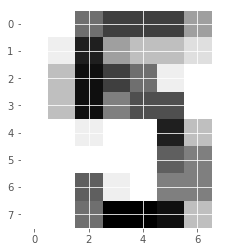

In [22]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [23]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


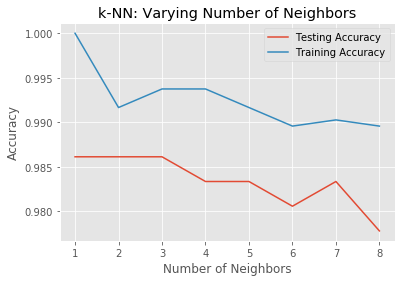

In [24]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Intro to Regression

In [25]:
boston = pd.read_csv('boston.csv')

print(boston.head())

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [26]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

# Slice out the column for average number of rooms
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [27]:
# Reshape the arrays to the desired shape
# To keep the first dimension but add another
# dimension of size 1 to X

y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

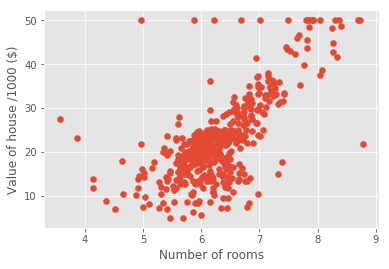

In [28]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

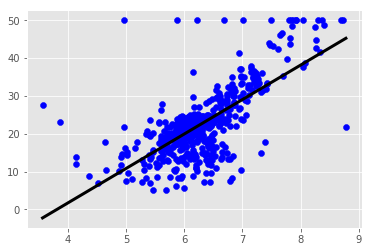

In [29]:
import numpy as np
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

In [30]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gm_2008_region.csv')

df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [31]:
# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [33]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


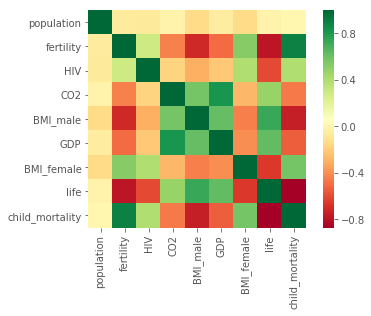

In [34]:
_ = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

## [Seaborn's heatmap function](http://seaborn.pydata.org/generated/seaborn.heatmap.html)

# Regression mechanics

In two dimensions, a straight line always takes the form y = ax + b
- y = target
- x = single feature
- a,b = parameters of model

### How do we choose `a` and `b`?

- Define an error function for any given line
    - Choose the line that minimizes the error function (a.k.a. loss function, cost function)
    
## Why do we not minimize the sum of residuals?

- Simply summing the residuals would result in large positive residuals cancelling out large negative residuals.
- Therefore, we minimize the **sum of squares** of residuals.

- Ordinary least squares (OLS): Minimizes sum of squares of residuals.
    - This is the same as minimizing the mean squared error of the predictions on the training set.

## Linear regression in higher dimensions

y = a1x1 + a2x2 + b

- To fit a linear regression model here:
- Need to specify 3 variables

- In higher dimensions:

y = a1x1 + a2x2 + a3x3 + anxn + b

- Must specify coefficient for each feature and the variable b

- Scikit-learn API works exactly the same way:
    - Pass two arrays: Features, and target

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7298987360907498

You will almost never use linear regression straight out of the box like this. You will normally use regularization which places further constraints on the coefficients.

0.6192442167740037


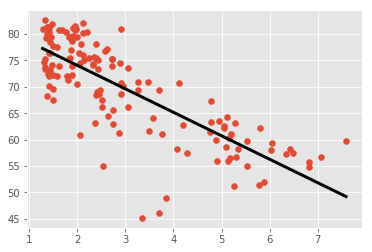

In [36]:
X_fertility = df['fertility'].values
X_fertility = X_fertility.reshape(-1, 1)
plt.scatter(df.fertility, df.life)
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [37]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907498
Root Mean Squared Error: 4.194027914110239


# Cross-Validation

- Model performance is dependent on the way the data is split
- Not representative of the model's ability to generalize
- use Cross-Validation

k folds = k-fold CV

In [38]:
from sklearn.model_selection import cross_val_score

reg = linear_model.LinearRegression()

cv_results = cross_val_score(reg, X, y, cv=5)

print(cv_results)

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]


In [39]:
np.mean(cv_results)

0.6168819644425119

In [40]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 0.6168819644425119


In [41]:
%timeit cross_val_score(reg, X, y, cv = 3)

3.03 ms ± 30 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
%timeit cross_val_score(reg, X, y, cv = 10)

9.38 ms ± 25.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [43]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.6294715754653507
0.5883937741571186


# Regularized regression

- **Why regularize?**

- Recall: Linear regression minimizes a loss function
- It chooses a coefficient for each feature variable
- Large coefficients can lead to overfitting
    - In higher dimensional space (with lots of features), with large coefficients, it is possible to make nearly any conclusion you would like.
    
- Because of this, it is beneficial to modify the loss function to penalize for large coefficients.
    - This is called **Regularization**

# Ridge regression

- Loss function = OLS loss function + $\alpha * \sum_{i=1}^{n}a{_{i}}^{2}$

- _The squared value of each coefficient, multiplied by some constant alpha._

- When minimizing the loss function to fit to our data, models are penalized for coefficients with a large magnitude (both positive and negative).

- Alpha: Parameter we need to choose
- Picking alpha here is similar to picking k in k-NN
- Hyperparameter tuning (more to come)
- Alpha (sometimes $\lambda$) controls model complexity
    - Alpha = 0: We get back OLS (Can lead to overfitting) because coefficients are not penalized
    
- Very high alpha (means that large coefficients are seriously penalized): Can lead to underfitting

In [44]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

ridge.score(X_test, y_test)

0.7400155738397822

# Lasso regression

- Loss function = OLS loss function + $\alpha * \sum_{i=1}^{n}\left | a_{i} \right |$

- Standard OLS loss function plus the absolute value of each coefficient, multiplied by some constant alpha $\alpha$.

In [45]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

lasso.score(X_test, y_test)

0.7391302460088129

# Lasso characteristics

- Can be used to select important features of a dataset
- Shrinks the coefficients of less important features to exactly 0

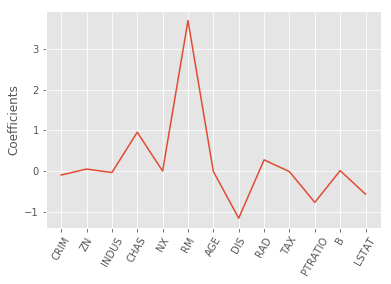

In [46]:
from sklearn.linear_model import Lasso

X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

y = y.reshape(-1, 1)

names = boston.drop('MEDV', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

### This above process for visualizing important features of a dataset cannot be understated.

- For communicating to management, or
- Leading further relevant investigation

Lasso's ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

In [47]:
# Create arrays for features and target variable
X = df.drop(['life', 'Region'], axis=1).values
y = df['life'].values

# Reshape X and y
y = y.reshape(-1, 1)
df.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region'],
      dtype='object')

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


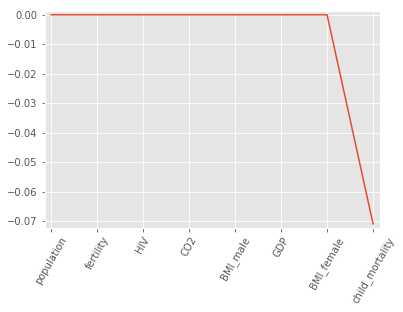

In [48]:
# Import Lasso
from sklearn.linear_model import Lasso

df_columns = ['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality']

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns, rotation=60)
plt.margins(0.02)
plt.show()

According to the lasso algorithm, it seems like `'child_mortality'` is the most important feature when predicting life expectancy.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2 norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each, using this function that we have defined for you, which plots the R2 score as well as standard error for each alpha:

In [49]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

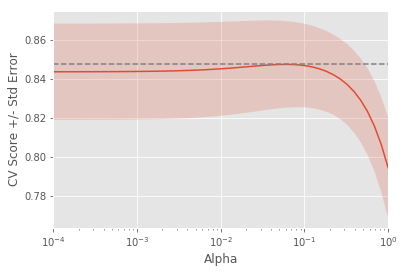

In [50]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


# How good is your model?

## Classification metrics

- Measuring model performance with accuracy:
    - Fraction of correctly classified samples
    - Not always a useful metric
    
## Class imbalance example: Emails

- Spam classification
    - 99% of emails are real; 1% of emails are spam
- Could build a classifier that predicts ALL emails as real
    - 99% accurate.
    - But horrible at actually classifying spam
    - Completely fails at its original purpose
- Need more nuanced metrics

## Diagnosing classification predictions
- Confusion matrix

<table>
    <tr>
    <th>  </th>
    <th> Predicted: Spam Email </th>
    <th> Predicted: Real Email </th>
    </tr>
    <tr>
    <th> Actual: Spam Email </th>
    <td> True Positive </td>
    <td> False Negative </td>
    </tr>
    <tr>
    <th> Actual: Real Email </th>
    <td> False Positive </td>
    <td> True Negative </td>
    </tr>
</table>

- Accuracy: $\frac{tp + tn}{tp + tn + fp + fn}$

- Precision: $\frac{tp}{tp + fp}$
    - Positive predicted value or PPV

- Recall: $\frac{tp}{tp + fn}$
    - Sensitivity, hit-rate, or true positive rate
    
- F1 score: $2 \cdot \frac{precision \cdot recall}{precision + recall}$
    - harmonic mean of precision and recall
    
- High precision: Not many real emails predicted as spam
- High recall: Predicted most spam emails correctly

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [52]:
print(confusion_matrix(y_test, y_pred))

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [53]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        23
          1       0.95      1.00      0.97        19
          2       1.00      0.94      0.97        18

avg / total       0.98      0.98      0.98        60



**For all metrics in scikit learn, the first argument is always the true label and the prediction is always the second argument.**

In [54]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
y = diabetes['diabetes']
X = diabetes.drop('diabetes', axis=1)

In [56]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
             precision    recall  f1-score   support

          0       0.76      0.85      0.80       206
          1       0.61      0.45      0.52       102

avg / total       0.71      0.72      0.71       308



# Logistic regression and the ROC curve

- Binary Classification
    - Logistic regression outputs probabilities. If we consider one feature:
    - If the probability 'p' is greater than 0.5:
        - The data is labeled '1'
    - If the probability 'p' is less than 0.5:
        - The data is labeled '0'
        
- Logistic Regression (log reg) produces a linear decision boundary.

In [57]:
# The well known algorithm for training, testing, and predicting

# (1) Perform the necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# (2) Instantiate the classifier
logreg = LogisticRegression()

# (3) Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# (4) Fit the model on your training data
logreg.fit(X_train, y_train)

# (5) And, predict on your test set.
y_pred = logreg.predict(X_test)

# Probability thresholds

- By default, logistic regression threshold = 0.5
- Not specific to log reg
    - k-NN classifiers also have thresholds
- What happens if we vary the threshold?

### The ROC Curve

- In particular, what happens to the true positive and false positive rates as we vary this threshold?

    - When the threshold = `0` -- The model predicts `1` for all the data. Which means the true positive rate equals the false positive rate, is equal to `1`.
    - When the threshold = `1` -- The model predicts `0` for all the data. Which means both true and false positive rates are equal to `0`.
    
- If we vary this threshold, we get different true and false positive rates.

- The **receiver operating characteristic (ROC) curve** is the resulting curve created by all values between `0` and `1` for the threshold. 

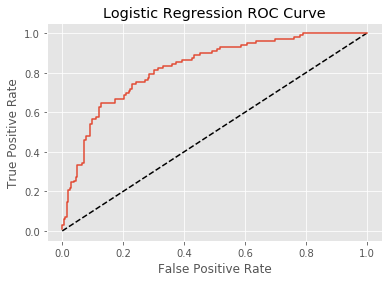

In [58]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

## Wrap your head around this:

**NOTE:** We used the predicted probabilities of the model assigning a value of `1` to the observation in question. This is because to compute the ROC, we do not mearly want the predictions on the test set but we want the probability that our log reg model outputs, before using a threshold to predict the label.

To achieve this we use:

```python
logreg.predict_proba(X_test)[:,1]
```

This returns an array with two columns. Each column contains the probabilities for the respective target values. In the previous code, we choose the second column (1 --> `[:,1]`) which is the probabilities of the predicted labels being `1`.

In [59]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  32]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.84       206
          1       0.67      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models.

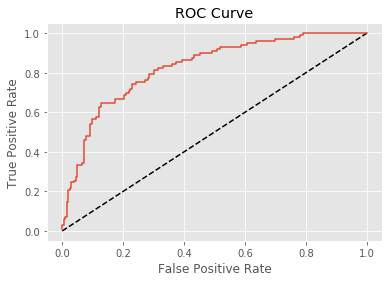

In [60]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Study the precision-recall curve and then consider the statements given below.

![precision-recall](precisionrecall.png)

True Statements:

- A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did not have diabetes.

- Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not having diabetes.

- When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.

- True negatives do not appear at all in the definitions of precision and recall.

# Area under the ROC curve

The question is: given an ROC curve, can we extract a metric of interest?

- Larger area under the ROC curve = **better model**

In [61]:
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

logreg.fit(X_train, y_train)

y_pred_prob = logreg.predict_proba(X_test)[:,1]

roc_auc_score(y_test, y_pred_prob)

0.8269084332762231

In [62]:
# AUC using cross_validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

print(cv_scores)

[0.79888889 0.80777778 0.81944444 0.86622642 0.85037736]


In [63]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8269084332762231
AUC scores computed using 5-fold cross-validation: [0.79888889 0.80777778 0.81944444 0.86622642 0.85037736]


# Hyperparameter tuning

- Linear regression: Choosing parameters
- Ridge/lasso regression: Choosing alpha
- k-Nearest Neighbors: Choosing n_neighbors
- Parameters like alpha and k are called **Hyperparameters**
- Hyperparameters cannot be learned by fitting the model

## Choosing the correct hyperparameter

- Try a bunch of different hyperparameter values
- Fit all of them separately
- See how well each performs
- Choose the best performing one
- It is essential to use cross-validation
    - Using `train-test-split` alone would risk over-fitting the hyperparameter to the test set.

## Grid search cross-validation

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 50)}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5)

# knn_cv.best_params_

# knn_cv.best_score_

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: `C`
. `C` controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large `C` can lead to an overfit model, while a small `C` can lead to an underfit model.

In [65]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1389495.494373136}
Best score is 0.7721354166666666


Just like k-NN, linear regression, and logistic regression, **decision trees** in scikit-learn have `.fit()` and `.predict()` methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as `max_features`, `max_depth`, and `min_samples_leaf`: This makes it an ideal use case for `RandomizedSearchCV`.

`RandomizedSearchCV`, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [66]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 6}
Best score is 0.7486979166666666


# Hold-out set reasoning

- How well can the model perform on never before seen data?

- Using ALL data for cross-validation is not ideal
- Split data into training and hold-out set at the beginning
- Perform grid search cross-validation on training set
- Choose best hyperparameters and evaluate on hold-out set

In [67]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


Lasso used the `L1` penalty to regularize, while ridge used the `L2` penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the `L1` and `L2` penalties:

$a \cdot L1 + b \cdot L2$

In scikit-learn, this term is represented by the `'l1_ratio'` parameter: An `'l1_ratio'` of `1` corresponds to an `L1` penalty, and anything lower is a combination of `L1` and `L2`.

In [68]:
df = pd.read_csv('gm_2008_region.csv')
y = df['life'].values
X = df.drop(['life', 'Region'], axis=1).values

# Reshape X and y
y = y.reshape(-1, 1)

# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460284
Tuned ElasticNet MSE: 10.057914133398437


# Preprocessing data

## Dealing with categorical features
- scikit-learn will not accept categorical features by default
- Need to encode categorical features numerically
- Convert to 'dummy variables'
    - 0: Observation was NOT that category
    - 1: Observation was that category
    
## In Python
- scikit-learn: OneHotEncoder()
- Pandas: get_dummies()

In [69]:
import pandas as pd

df = pd.read_csv('auto.csv')

df.drop(['name', 'color', 'marker'], 
        axis=1, inplace=True)

In [70]:
df_origin = pd.get_dummies(df)

print(df_origin.head())

    mpg  cyl  displ   hp  weight  accel  yr       size  origin_Asia  \
0  18.0    6  250.0   88    3139   14.5  71  27.370336            0   
1   9.0    8  304.0  193    4732   18.5  70  62.199511            0   
2  36.1    4   91.0   60    1800   16.4  78   9.000000            1   
3  18.5    6  250.0   98    3525   19.0  77  34.515625            0   
4  34.3    4   97.0   78    2188   15.8  80  13.298178            0   

   origin_Europe  origin_US  
0              0          1  
1              0          1  
2              0          0  
3              0          1  
4              1          0  


In [71]:
df_origin = df_origin.drop('origin_Asia', axis=1)

In [72]:
y = df_origin['mpg'].values
X = df_origin.drop('mpg', axis=1).values

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)
ridge.score(X_test, y_test)

0.7753127200011287

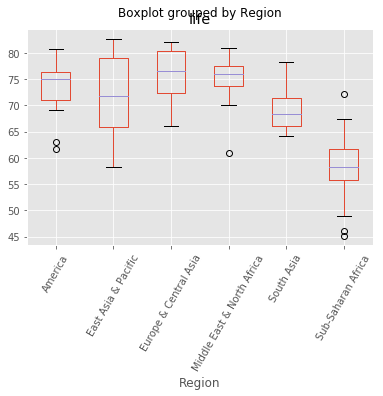

In [73]:
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('gm_2008_region.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

In [74]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print('\n', df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')

 Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [75]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.84672951 0.75486179 0.7330742  0.77464313 0.78261349]


# Handling missing data

In [76]:
df = pd.read_csv('diabetes.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [77]:
print(df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


Instances of insulin = 0
Also, triceps = 0

In [78]:
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


# Imputing missing data

- Making an educated guess about the missing values

In [79]:
y = df['diabetes'].values
X = df.drop('diabetes', axis=1).values

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X = imp.transform(X)

# Imputing within a pipeline

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
logreg = LogisticRegression()
steps = [('imputation', imp), ('logistic_regression', logreg)]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

0.7619047619047619

**NOTE:** In a pipeline, each step but the last must be a transformer. And the last must be an estimator, such as a classifier, regressor, or transformer.

In [81]:
# df = pd.read_csv('house-votes-84.csv', na_values='?', true_values='y', 
                # false_values='n', header=None, names=columns)
columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df = pd.read_csv('house-votes-84.csv', header=None, names=columns)
    
# Convert '?' to NaN
df[df == '?'] = np.nan
df[df == 'y'] = 1
df[df == 'n'] = 0

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))


party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


# SVM Support Vector Machine

[SVM Documentation](http://scikit-learn.org/stable/modules/svm.html)

SVC stands for Support Vector Classification, which is a type of SVM.

In [82]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

y = df.party.values
X = df.drop('party', axis=1).values

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

In [83]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

   democrat       0.97      0.97      0.97        36
 republican       0.97      0.97      0.97        34

avg / total       0.97      0.97      0.97        70



# Centering and scaling

In [84]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Why scale your data?
- Many models use some form of distance to inform them
- Features on larger scales can unduly influence the model
- Example: k-NN uses distance explicitly when making predictions
- We want features to be on a similar scale
- Normalizing (or scaling and centering)

## Ways to normalize your data
- Standardization: Subtract the mean and divide by variance
    - All features are centered around zero and have variance one.
- Can also subtract the minimum and divide by the range
    - Minimum zero and maximum one
- Can also normalize so the data ranges from -1 to +1

[Scikit Learn Docs - Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html)

In [85]:
from sklearn.preprocessing import scale
y = df.quality.values
X = df.drop('quality', axis=1).values

y = y.reshape(-1, 1)

X_scaled = scale(X)
np.mean(X), np.std(X)

(8.134219224515322, 16.726533979432848)

In [86]:
np.mean(X_scaled), np.std(X_scaled)

(2.546626531486538e-15, 1.0)

```python
from sklearn.preprocessing import StandardScaler
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

knn_scaled = pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

knn_scaled.score(y_test, y_pred)

knn.unscaled = KNeighborsClassifier().fit(X_train, y_train)

knn_unscaled.score(X_test, y_test)
```

# CV and scaling in a pipeline

```python
steps = [('scaler', StandardScaler()), 
        ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {knn__n_neighbors=np.arange(1, 50)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

print(cv.best_params_)

print(cv.score(X_test, y_test))

print(classification_report(y_test, y_pred))
```

In [87]:
white = pd.read_csv('white-wine.csv')
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [88]:
y = white.quality.values
X = white.drop('quality', axis=1).values

In [89]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571
Mean of Scaled Features: 2.7314972981668206e-15
Standard Deviation of Scaled Features: 0.9999999999999999


In [90]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.5496598639455782
Accuracy without Scaling: 0.47551020408163264


In [91]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.5857142857142857
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.40      0.29      0.33        28
          5       0.62      0.59      0.60       289
          6       0.60      0.72      0.65       447
          7       0.53      0.38      0.44       177
          8       0.33      0.13      0.19        38

avg / total       0.57      0.59      0.57       980

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [92]:
df = pd.read_csv('gm_2008_region.csv')
y = df['life'].values
X = df.drop(['life', 'Region'], axis=1).values

In [93]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888217


We have learned the fundamentals for using machine learning techniques to build predictive models for both regression and classification problems.

We have learned the concepts of underfitting and overfitting, the techiques for test-train split, cross-validation, and Grid search in order to fine-tune our models and find out how good they are.

We have first hand experience with using regularization in our models. Seen the utility of lasso and ridge regression. And learned many types of data preprocessing steps.